In [39]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PowerTransformer,OneHotEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


In [3]:
df = pd.read_excel(r"C:\Users\sreya\Downloads\customer_churn_large_dataset.xlsx")

In [4]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [5]:
def check_df(dataframe):
    print("################ Shape ####################")
    print(dataframe.shape)
    print("############### Columns ###################")
    print(dataframe.columns)
    print("############### Types #####################")
    print(dataframe.dtypes)
    print("############### Head ######################")
    print(dataframe.head())
    print("############### Tail ######################")
    print(dataframe.tail())
    print("############### Describe ###################")
    print(dataframe.describe().T)

check_df(df)

################ Shape ####################
(100000, 9)
############### Columns ###################
Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')
############### Types #####################
CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object
############### Head ######################
   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5

In [6]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

- As we can see Churn should be in object.

In [7]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

- As we can see there is no null values present in the dataset.

In [8]:
df['Name'].nunique()

100000

- As we can see all the values of Name column are unique

In [9]:
# We don't need CustomerID and name feature so I am deleting that
df=df.drop(columns=['CustomerID','Name'],axis = 1)

<AxesSubplot:>

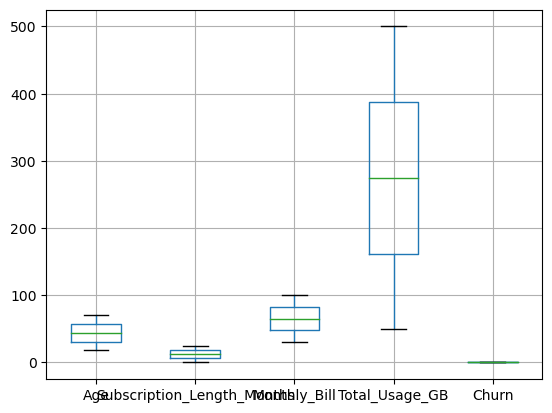

In [10]:
# Creating a box plot to cheack for outliers
df.boxplot()


- As we can see there is no outliers present in the dataframe

In [11]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

In [12]:
cat_summary(df,'Location')

             Location   Ratio
Houston         20157  20.157
Los Angeles     20041  20.041
Miami           20031  20.031
Chicago         19958  19.958
New York        19813  19.813


- As we can see approximately same data of each location present in the dataframe.

 # EDA

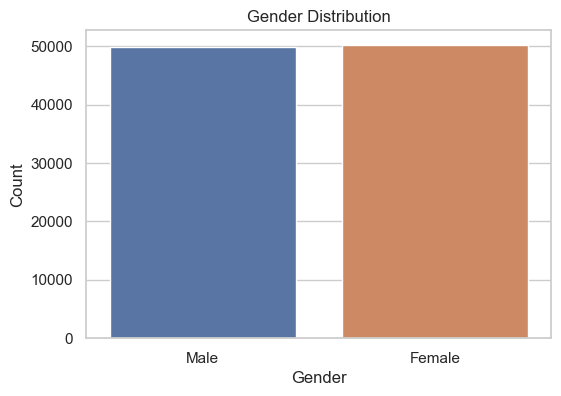

In [13]:
# Create a count plot for the 'Gender' column
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Show the plot
plt.show()


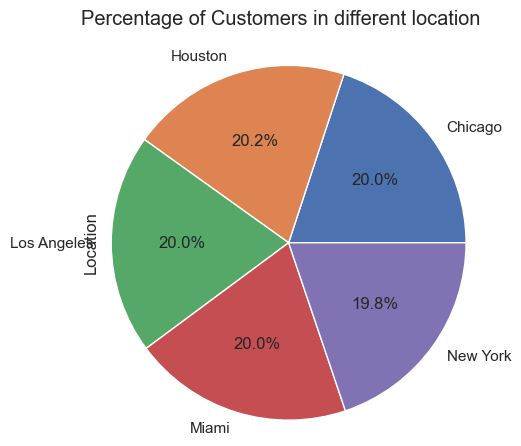

In [14]:
plt.suptitle('Percentage of Customers in different location')
df.groupby('Location')['Location'].count().plot.pie(autopct="%1.1f%%",radius=1.2)
plt.show()

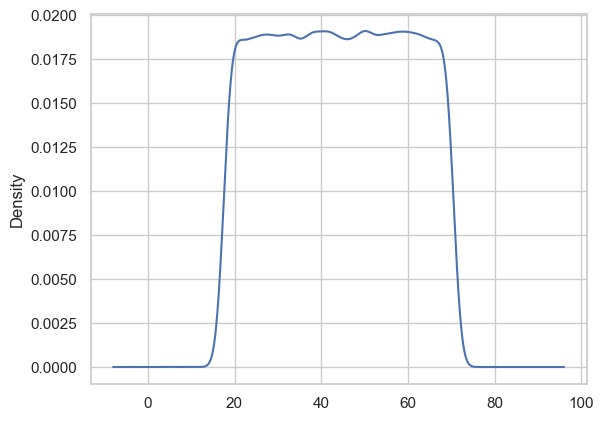

In [15]:
df['Age'].plot(kind='kde')
plt.show()

- As we can see most number of customers are from age group of 20 to 70

In [16]:
a=pd.DataFrame(df.Age.value_counts().sort_index()).style.background_gradient('magma_r')
a

,Age
18,1839
19,1941
20,1886
21,1897
22,1787
23,1887
24,1876
25,1871
26,1874
27,1924


In [17]:
df['Age'].describe()

count    100000.000000
mean         44.027020
std          15.280283
min          18.000000
25%          31.000000
50%          44.000000
75%          57.000000
max          70.000000
Name: Age, dtype: float64

In [18]:
df['Age'].mode()

0    33
Name: Age, dtype: int64

- Above Information We can say that data's are Positively skewed / right skewed
- We can observe that Minmum Customer's age is 18 years
- Maximum Customer's age is 70 years

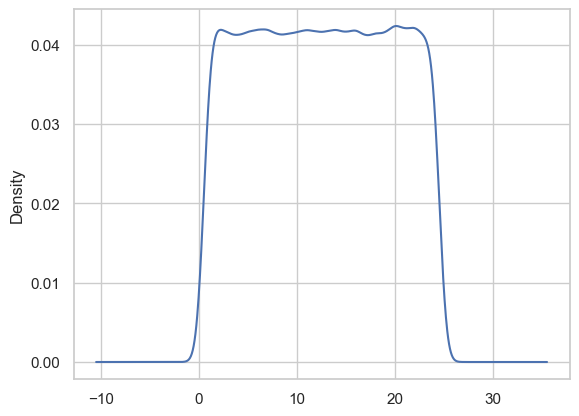

In [19]:
df['Subscription_Length_Months'].plot(kind ='kde')
plt.show()

In [20]:
pd.DataFrame(df['Subscription_Length_Months'].value_counts().sort_index()).style.background_gradient('magma_r')

,Subscription_Length_Months
1,4247
2,4228
3,4136
4,4098
5,4171
6,4184
7,4211
8,4106
9,4134
10,4151


In [21]:
df['Subscription_Length_Months'].describe()

count    100000.000000
mean         12.490100
std           6.926461
min           1.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          24.000000
Name: Subscription_Length_Months, dtype: float64

In [22]:
df['Subscription_Length_Months'].mode()

0    20
Name: Subscription_Length_Months, dtype: int64

- From Above Information We can say that data's are Distributed towards Rightside (Positively Skewed)
- Minimum Subscription Length is 1 month
- Maximum Subscription length is 24 month
- Average Subscription Length is for 12 Months

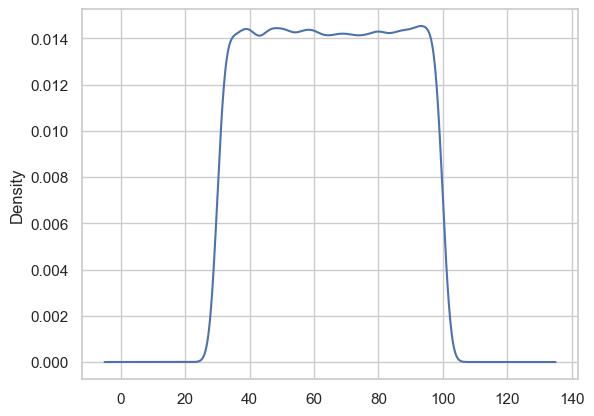

In [23]:
df['Monthly_Bill'].plot(kind ='kde')
plt.show()

In [24]:
df['Monthly_Bill'].describe()

count    100000.000000
mean         65.053197
std          20.230696
min          30.000000
25%          47.540000
50%          65.010000
75%          82.640000
max         100.000000
Name: Monthly_Bill, dtype: float64

In [25]:
df['Monthly_Bill'].mode()

0    84.37
Name: Monthly_Bill, dtype: float64

- From Above Information We can say that data's are Distributed towards Rightside (Positively Skewed)

- Minimum Monthly bill for Subscriber is around $ 30

- Maximum Monthly bill is around $ 100

- Average Monthly Bill is Around $ 65

# Bivariant Analysis

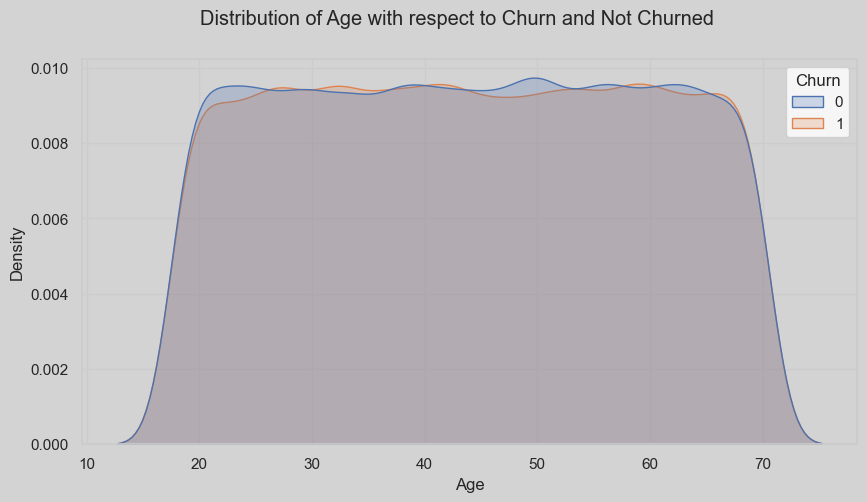

In [26]:
plt.figure(figsize=(10,5),facecolor='lightgrey')
plt.suptitle('Distribution of Age with respect to Churn and Not Churned')
a=plt.axes()
axes=a.set_facecolor('lightgrey')
sns.kdeplot(data=df,x='Age',hue='Churn',fill=True,legend=['not Churnd','churned'],ax=axes)
plt.show()

- Customers Who's Age is 19 are more are has less Churn Rate

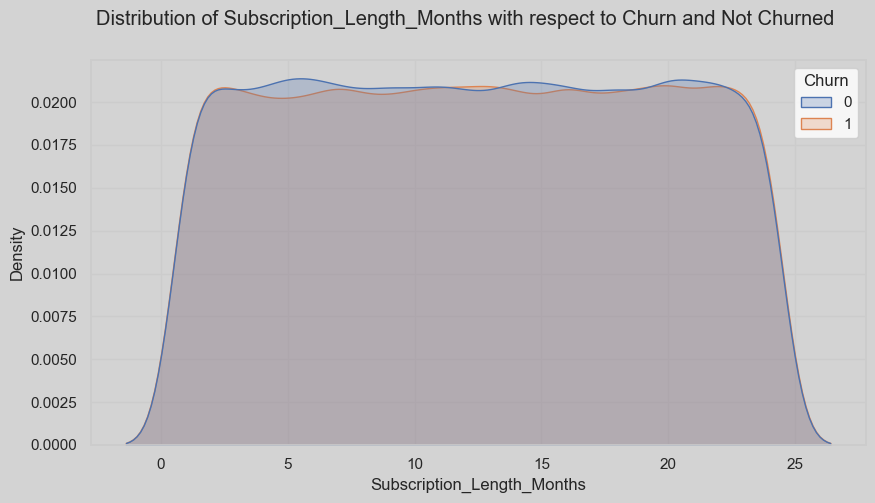

In [27]:
plt.figure(figsize=(10,5),facecolor='lightgrey')
plt.suptitle('Distribution of Subscription_Length_Months with respect to Churn and Not Churned')
a=plt.axes()
axes=a.set_facecolor('lightgrey')
sns.kdeplot(data=df,x='Subscription_Length_Months',hue='Churn',fill=True,legend=['not Churnd','churned'],ax=axes)
plt.show()

- During First And Last months Churn rate is slightly More In between Months as slighly less Churn rate

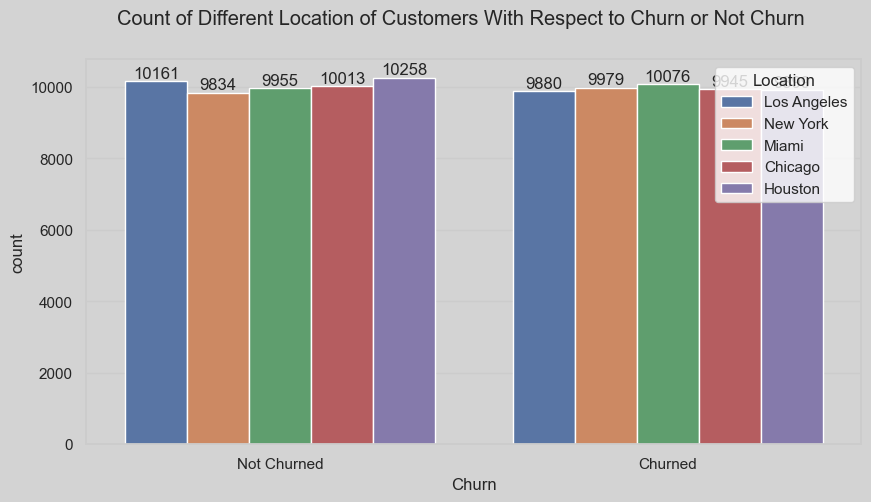

In [28]:
plt.figure(figsize=(10,5),facecolor='lightgrey')
plt.suptitle('Count of Different Location of Customers With Respect to Churn or Not Churn')
a=plt.axes()
axes=a.set_facecolor('lightgrey')
c=sns.countplot(data=df,x='Churn',hue='Location')
new_label=['Not Churned','Churned']
c.set_xticklabels(new_label)
for label in a.containers:
    a.bar_label(label)
plt.show()


- Houston as most number of Not Churn Customers then other Location's

- Miami as most number of Churn Customers compared to other Countries

In [29]:
x=[]
for i in df['Subscription_Length_Months']:
    if i <= 6:
        x.append('not good')
    elif i <= 12 and i>=6:
        x.append('average')
    elif i <=18 and i>=12:
        x.append('good')
    else:
        x.append('best')


In [30]:
# Creating a new feature Rating derived from Subscription_Length_Months
df['Reviews'] = x

In [31]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Reviews
0,63,Male,Los Angeles,17,73.36,236,0,good
1,62,Female,New York,1,48.76,172,0,not good
2,24,Female,Los Angeles,5,85.47,460,0,not good
3,36,Female,Miami,3,97.94,297,1,not good
4,46,Female,Miami,19,58.14,266,0,best


In [32]:
# Separating cat and numerical values
cat = ['Gender','Location','Reviews']
num = ['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']


In [33]:
# Spliting the values into train and test
x = df[cat + num]
y = df['Churn']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,
                                            test_size=0.3,
                                            random_state = 20)

In [34]:
# Creating a pipeline for Scaling and transformation

preprocessor = ColumnTransformer(transformers = [
            ('cont_pipeline' , Pipeline([
            ( 'cont_scale', StandardScaler()),
              
            ]), num),
            
            ('nom_pipeline', Pipeline([
            ('nom_encode',OneHotEncoder())
            ]),cat),
    
        
],remainder = 'passthrough')

xtrain = preprocessor.fit_transform(xtrain)
xtest = preprocessor.transform(xtest)

# Building models

In [37]:
# Applying linear Rgression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)

yTrainPred = LR.predict(xtrain)
yTestPred = LR.predict(xtest)

In [42]:
accuracy_score(ytrain, yTrainPred), accuracy_score(ytest, yTestPred)

(0.5052857142857143, 0.49993333333333334)

In [50]:
# I created a function which will give u the classification_report
def Classification_Report(actuals,predicteds):
    
    f1_scores = []
    recalls = []
    accuracys = []
    precisions = []
    
    for i in actuals.unique():
        tp = 0
        fp = 0
        fn = 0
        
        for actual,predicted in zip(actuals,predicteds):
            if actual == i and predicted == i:
                tp += 1
                
            elif actual != i and predicted == i:
                fp += 1
                
            elif actual == i and predicted != i:
                fn += 1
            
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        accuracy = tp/(tp+fp+fn) if (tp+fp+fn) > 0 else 0
        
        precisions.append(precision)
        accuracys.append(accuracy)
        recalls.append(recall)
        f1_scores.append(f1_score)
    
    return pd.DataFrame({'Precision':precisions,'Recall':recalls,'f1_score':f1_scores,'Accuracys':accuracys},
                       index = actuals.unique())
   
        

In [57]:
Classification_Report(ytest,yTestPred)

,Precision,Recall,f1_score,Accuracys
0,0.495351,0.508451,0.501815,0.334949
1,0.489045,0.475961,0.482414,0.317883


In [46]:
# Applying Randomforest
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

yTrainPred = rf.predict(xtrain)
yTestPred = rf.predict(xtest)

In [47]:
accuracy_score(ytrain, yTrainPred), accuracy_score(ytest, yTestPred)

(1.0, 0.4923)

- As we can see random forest is completely overfitting 

## Final MOdel

In [52]:

RFC = RandomForestClassifier(n_estimators=500,max_depth=15,min_samples_split=5)

RFC.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=500)

In [53]:
accuracy_score(ytrain, yTrainPred), accuracy_score(ytest, yTestPred)

(1.0, 0.4923)

In [58]:
Classification_Report(ytest,yTestPred)

,Precision,Recall,f1_score,Accuracys
0,0.495351,0.508451,0.501815,0.334949
1,0.489045,0.475961,0.482414,0.317883


In [ ]:
# As we can see the performance is not increasing after tuning also